Project 1- Airbnb Analysis

In [9]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import pprint
import gmaps
from matplotlib import cm
import numpy as np

In [4]:
#Import csv file

df = pd.read_csv("Resources/listings.csv")
master_df = pd.DataFrame(df)
master_df = master_df.loc[df['number_of_reviews']>1]
master_df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,360,https://www.airbnb.com/rooms/360,20180827015748,2018-08-27,LoHi Secret garden at the Chickadee Cottage,Come enjoy our oasis is the city and stay at o...,Chickadee Cottage is the largest of our guest ...,Come enjoy our oasis is the city and stay at o...,none,those who are interested in our local brews - ...,...,t,2017-BFN-0002177,"{""Colorado State"","" the City and County of Den...",t,f,moderate,t,t,3,3.00
1,590,https://www.airbnb.com/rooms/590,20180827015748,2018-08-27,Comfortable - and a great value!,"Large guest room in my home, where I also live...",I have been enjoying welcoming many wonderful ...,"Large guest room in my home, where I also live...",none,I love the diversity of my neighborhood and it...,...,t,2018-BFN-O0O5791,"{""Colorado State"","" the City and County of Den...",f,f,flexible,f,f,2,4.71
2,592,https://www.airbnb.com/rooms/592,20180827015748,2018-08-27,private,Denver short-term-rental license number 2016-B...,This is a basement room. You can sometimes he...,Denver short-term-rental license number 2016-B...,none,NaN,...,t,2016-BFN-0008735,"{""Colorado State"","" the City and County of Den...",f,f,flexible,f,f,2,1.23
3,686,https://www.airbnb.com/rooms/686,20180827015748,2018-08-27,Alexandra's Uptown Queen Bed Room,Thank you for visiting my Queen Bed Room site!...,Thank you for checking out my Bed and Breakfas...,Thank you for visiting my Queen Bed Room site!...,none,"I love my Uptown neighborhood, which is within...",...,t,2016-BFN-0008368,"{""Colorado State"","" the City and County of Den...",t,f,moderate,f,f,3,1.91
4,1940,https://www.airbnb.com/rooms/1940,20180827015748,2018-08-27,Baker Studio Close to EVERYTHING,Significant discounts for week or month+ reser...,The studio is highly functional and cozy. It ...,Significant discounts for week or month+ reser...,none,Baker is a historic neighborhood with quaint V...,...,t,344114-070056 2018-BFN-0002596,"{""Colorado State"","" the City and County of Den...",f,f,strict_14_with_grace_period,f,f,1,1.08


In [5]:
#Create a new DataFrame to hold useful columns
new_df = df[["property_type", "id", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "bed_type", "review_scores_rating"]]
new_df.head()

,property_type,id,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,review_scores_rating
0,Guesthouse,360,Entire home/apt,5,1.0,2,2.0,Futon,100.0
1,House,590,Private room,3,1.0,1,1.0,Real Bed,96.0
2,House,592,Private room,2,1.0,1,1.0,Real Bed,97.0
3,House,686,Private room,2,2.0,1,1.0,Real Bed,95.0
4,Guesthouse,1940,Entire home/apt,2,1.0,0,1.0,Real Bed,99.0


In [6]:
#Groupby the property type and average rating/number of properties
prop_group = new_df.groupby(['property_type'])
prop_count = prop_group["id"].count()
rating_mean = prop_group["review_scores_rating"].mean()
prof_df = pd.DataFrame({"Property Count": prop_count, "Average Rating": rating_mean})
prof_df = prof_df.dropna(how="any")
prof_df = prof_df.sort_values("Average Rating", ascending=False)
prof_df.head()

,Property Count,Average Rating
property_type,,
Villa,7,99.750000
Tiny house,5,99.600000
Guesthouse,121,98.286957
Tent,2,98.000000
Townhouse,608,97.812044


In [28]:
count_df = prof_df.sort_values("Property Count", ascending=False)

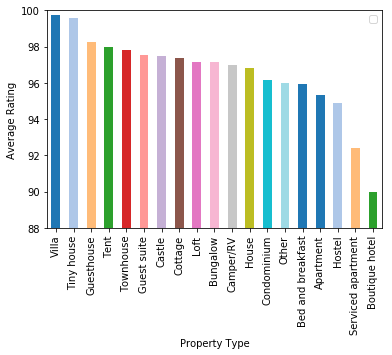

In [24]:
plot_df = prof_df.plot.bar(y="Average Rating", color=colors)
plt.ylim(88, 100)
plt.legend("")
plt.xlabel("Property Type")
plt.ylabel("Average Rating")
cmap = plt.cm.tab20
colors = cmap(np.linspace(0.,1., len("Average Rating")))

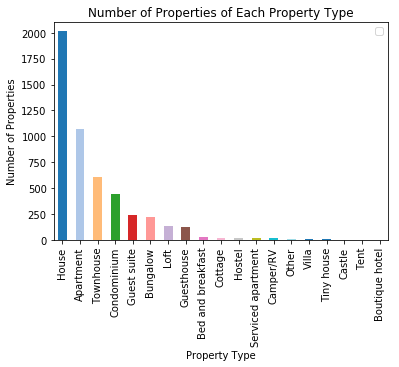

In [29]:
count_df = count_df.plot.bar(y="Property Count", color=colors)
plt.ylim(0, 2100)
plt.legend("")
plt.xlabel("Property Type")
plt.ylabel("Number of Properties")
plt.title("Number of Properties of Each Property Type")
cmap = plt.cm.tab20
colors = cmap(np.linspace(0.,1., len("Property Count")))

In [13]:
#Groupby room type and average rating
room_group = new_df.groupby(['room_type'])
prop_count = room_group["id"].count()
rating_mean = room_group["review_scores_rating"].mean()
room_df = pd.DataFrame({"Property Count": prop_count, "Average Rating": rating_mean})
room_df = room_df.dropna(how="any")
room_df = room_df.sort_values("Average Rating", ascending=False)
room_df.head()

,Property Count,Average Rating
room_type,,
Private room,1239,96.879231
Entire home/apt,3664,96.688679
Shared room,81,93.492308


Text(0.5,1,'Average Rating of Each Room Type')

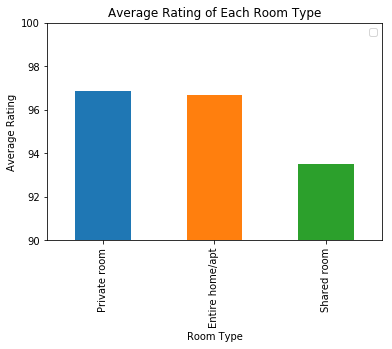

In [17]:
room = room_df.plot.bar(y="Average Rating")
plt.ylim(90, 100)
plt.legend("")
plt.xlabel("Room Type")
plt.ylabel("Average Rating")
plt.title("Average Rating of Each Room Type")
cmap = plt.cm.tab20
colors = cmap(np.linspace(0.,1., len("Average Rating")))

Text(0.5,1,'Average Rating of Each Room Type')

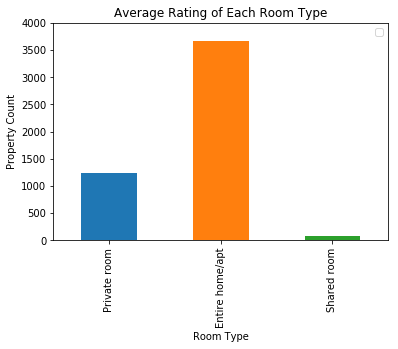

In [19]:
room2 = room_df.plot.bar(y="Property Count")
plt.ylim(0, 4000)
plt.legend("")
plt.xlabel("Room Type")
plt.ylabel("Property Count")
plt.title("Average Rating of Each Room Type")

In [26]:
#Groupby bed type and average rating
bed_group = new_df.groupby(['bed_type'])
prop_count = bed_group["id"].count()
rating_mean = bed_group["review_scores_rating"].mean()
bed_df = pd.DataFrame({"Property Count": prop_count, "Average Rating": rating_mean})
bed_df = bed_df.sort_values("Average Rating", ascending=False)
bed_df

,Property Count,Average Rating
bed_type,,
Futon,17,97.941176
Pull-out Sofa,13,96.818182
Real Bed,4939,96.713853
Airbed,10,89.500000
Couch,5,85.000000


Text(0.5,1,'Average Rating by Bed Type')

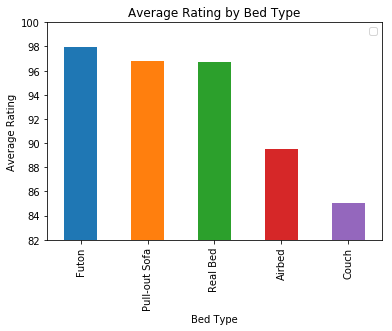

In [29]:
bed_type = bed_df.plot.bar(y="Average Rating")
plt.ylim(82, 100)
plt.legend("")
plt.xlabel("Bed Type")
plt.ylabel("Average Rating")
plt.title("Average Rating by Bed Type")

In [35]:
#Group by the number of people the listing accommodates
num_group = new_df.groupby(['accommodates'])
prop_count = num_group["id"].count()
rating_mean = num_group["review_scores_rating"].mean()
num_df = pd.DataFrame({"Property Count": prop_count, "Average Rating": rating_mean})
num_df = num_df.sort_values("Average Rating", ascending=False)
num_df.head()

,Property Count,Average Rating
accommodates,,
13,6,99.833333
15,7,98.333333
11,23,98.000000
7,114,97.912621
16,49,97.500000


Text(0.5,1,'Average Rating by Accommodation Number')

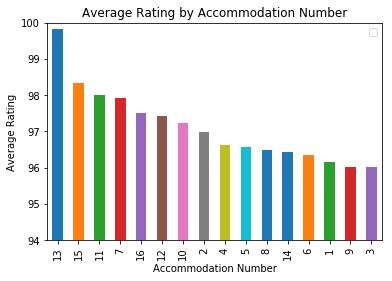

In [39]:
num_type = num_df.plot.bar(y="Average Rating")
plt.ylim(94, 100)
plt.legend("")
plt.xlabel("Accommodation Number")
plt.ylabel("Average Rating")
plt.title("Average Rating by Accommodation Number")